## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_name):
    '''加载数据'''
    xys = []
    with open(file_name, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
    return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [2]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    '''多项式基函数'''
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    feat = [x]
    for i in range(2, feature_num+1):
        feat.append(x**i)
    # print(len(feat[0]))
    ret = np.concatenate(feat, axis=1)
    # print('phi',ret.shape)
    return ret

def gaussian_basis(x, feature_num=10):
    centers = np.linspace(0, 25, feature_num)
    width = 1.0 * (centers[1] - centers[0])
    x = np.expand_dims(x, axis=1)
    x = np.concatenate([x]*feature_num, axis=1)
    
    out = (x-centers)/width
    ret = np.exp(-0.5 * out ** 2)
    return ret

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [3]:
def main(x_train, y_train):
    '''
    训练模型，并返回从x到y的映射
    '''
    # basis_function = multinomial_basis
    basis_function = gaussian_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_function(x_train)
    phi  = np.concatenate([phi0, phi1], axis=1)
    #---------
    #最小二乘法
    #---------
    # w = np.dot(np.linalg.pinv(phi), y_train)

    #---------
    #梯度下降法
    #---------
    def fun(w0, phi, y):
        return np.dot(phi.T, (np.dot(phi, w0) - y))

    def gradient(phi, y, a=0.001, n_iters=10000):
        w = np.zeros(phi.shape[1])

        for i in range(n_iters):
            w = w + a * fun(w, phi, y)
        return w

    w = gradient(phi, y_train)

    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_function(x)
        phi  = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y
    
    return f


## 评估结果 
> 没有需要填写的代码，但是建议读懂

训练集预测值与真实值的标准差：nan
(200,)
预测值与真实值的标准差：nan


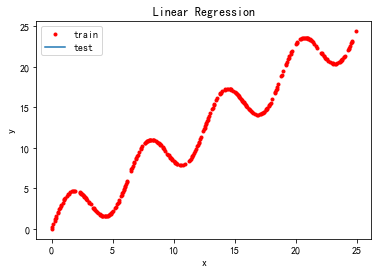

In [4]:
def evaluate(ys, ys_pred):
    '''评估模型'''
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test,  y_test  = load_data(test_file)
    # print(x_train.shape, x_test.shape)
    # print(y_train.shape)

    # 使用线性回归模型训练模型，返回一个函数f()使得y=f(x)
    f = main(x_train, y_train)
    
    y_train_predit = f(x_train)
    std = evaluate(y_train, y_train_predit)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

    # 计算预测的输出值
    y_test_predit = f(x_test)
    print(y_test_predit.shape)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_predit)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    # 显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    # plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_predit)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()

In [2]:
import numpy as np

a = np.array([[8, 1, 6], [3, 5, 7],[4, 9, 2]])
np.max(a, axis=0)

array([8, 9, 7])

In [3]:
a

array([[8, 1, 6],
       [3, 5, 7],
       [4, 9, 2]])